## Feature Scaler - MinMaxScaler

### Import the relevant libraries to use

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Read the data into dataframe

In [5]:
# Read training features into X_train
X_train=pd.read_csv('./data/X_train.csv')
# Read training target into Y_train
Y_train=pd.read_csv('./data/Y_train.csv')

# Read testing features into X_test
X_test=pd.read_csv('./data/X_test.csv')
# Read testing target into Y_test
Y_test=pd.read_csv('./data/Y_test.csv')

# Display the top 5 rows
X_train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001032,Male,No,0,Graduate,No,4950,0.0,125,360,1,Urban
1,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Semiurban
2,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56,180,1,Semiurban
3,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112,360,1,Urban
4,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136,360,1,Urban
5,LP001854,Male,Yes,3+,Graduate,No,5250,0.0,94,360,1,Urban
6,LP002505,Male,Yes,0,Graduate,No,4333,2451.0,110,360,1,Urban
7,LP002862,Male,Yes,2,Not Graduate,No,6125,1625.0,187,480,1,Semiurban
8,LP001630,Male,No,0,Not Graduate,No,2333,1451.0,102,480,0,Urban
9,LP001964,Male,Yes,0,Not Graduate,No,1800,2934.0,93,360,0,Urban


In [6]:
Y_train.head()

,Target
0,Y
1,Y
2,Y
3,Y
4,Y


In [7]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((384, 12), (96, 12), (384, 1), (96, 1))

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            384 non-null    object 
 1   Gender             384 non-null    object 
 2   Married            384 non-null    object 
 3   Dependents         384 non-null    object 
 4   Education          384 non-null    object 
 5   Self_Employed      384 non-null    object 
 6   ApplicantIncome    384 non-null    int64  
 7   CoapplicantIncome  384 non-null    float64
 8   LoanAmount         384 non-null    int64  
 9   Loan_Amount_Term   384 non-null    int64  
 10  Credit_History     384 non-null    int64  
 11  Property_Area      384 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 36.1+ KB


In [77]:
X_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,384.000000,384.000000,384.000000,384.000000,384.000000
mean,5149.718750,1572.077917,141.471354,342.093750,0.856771
std,5304.921764,2624.223119,75.176271,65.846658,0.350763
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3893.500000,1188.500000,128.000000,360.000000,1.000000
75%,5819.500000,2259.250000,164.250000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [28]:
X_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area         object
dtype: object

Get numerical features:

In [14]:
num_features = X_train.dtypes[(X_train.dtypes=="float64")|(X_train.dtypes=="int64")].index.values
num_features

array(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'], dtype=object)

An other way to get numerical features:

In [34]:
num_features = X_train.select_dtypes( include = ['number']).columns
num_features

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

Get categorical features:

In [38]:
cat_features = X_train.select_dtypes( include = ['object']).columns
cat_features

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')

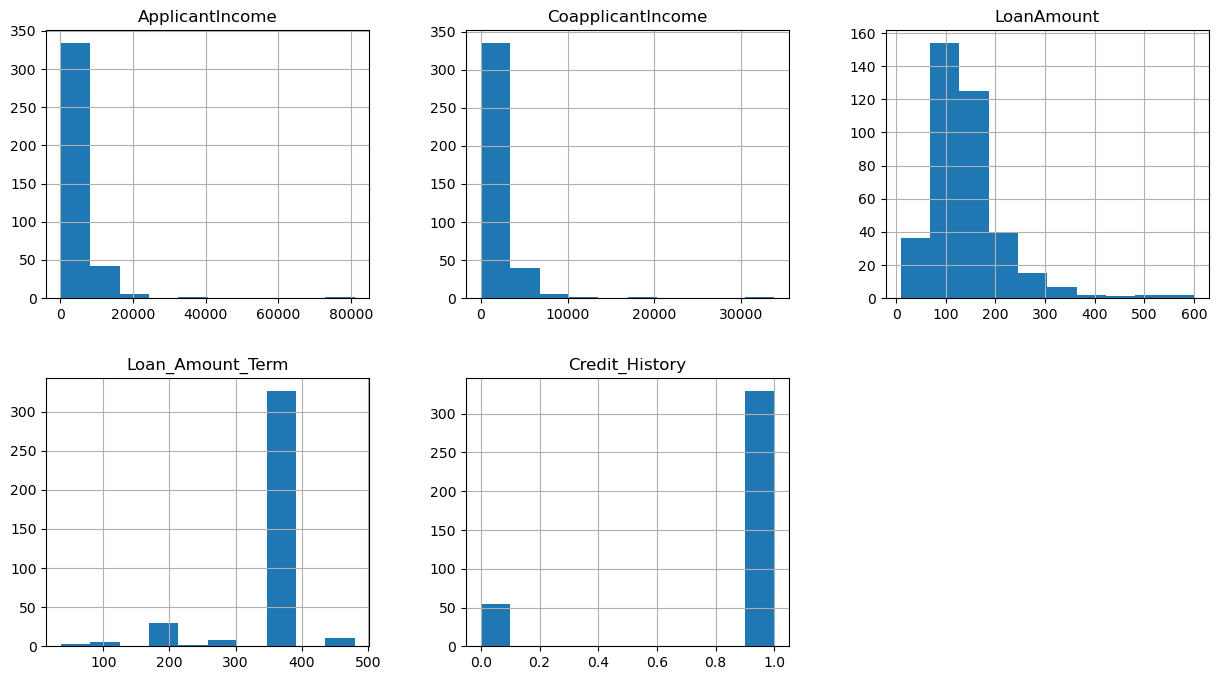

In [48]:
X_train[num_features].hist( layout=(2, 3), figsize=(15,8))
plt.show()

### Import MinMaxScaler, KNN classifier and Accuracy Score

In [49]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### Initialize the MinMaxScaler

In [50]:
min_max=MinMaxScaler()

In [68]:
num_cols_train = X_train.select_dtypes( include = ['number'])
num_cols_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4950,0.0,125,360,1
1,2882,1843.0,123,480,1
2,3000,3416.0,56,180,1
3,9703,0.0,112,360,1
4,2333,2417.0,136,360,1
...,...,...,...,...,...
379,3597,2157.0,119,360,0
380,2583,2167.0,104,360,1
381,5923,2054.0,211,360,1
382,2971,2791.0,144,360,1


In [69]:
num_cols_test = X_test.select_dtypes( include = ['number'])

In [70]:
X_train_minmax = min_max.fit_transform( num_cols_train )
X_test_minmax = min_max.fit_transform( num_cols_test )

In [71]:
X_train_minmax

array([[0.0593692 , 0.        , 0.1962775 , 0.72972973, 1.        ],
       [0.03379097, 0.054467  , 0.1928934 , 1.        , 1.        ],
       [0.03525046, 0.10095458, 0.07952623, 0.32432432, 1.        ],
       ...,
       [0.07140383, 0.06070278, 0.34179357, 0.72972973, 1.        ],
       [0.03489177, 0.08248367, 0.2284264 , 0.72972973, 1.        ],
       [0.05482993, 0.16623814, 0.41624365, 0.72972973, 1.        ]])

In [76]:
X_train_minmax_df = pd.DataFrame( X_train_minmax, columns = num_cols_train.columns)
X_train_minmax_df.round(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.059,0.000,0.196,0.730,1.0
1,0.034,0.054,0.193,1.000,1.0
2,0.035,0.101,0.080,0.324,1.0
3,0.118,0.000,0.174,0.730,1.0
4,0.027,0.071,0.215,0.730,1.0
...,...,...,...,...,...
379,0.043,0.064,0.186,0.730,0.0
380,0.030,0.064,0.161,0.730,1.0
381,0.071,0.061,0.342,0.730,1.0
382,0.035,0.082,0.228,0.730,1.0


In [ ]:
# Just to check that the minimum value of "LoanAmount" was mapped to 0, and the maximum to 1

X_train_minmax_df[ (X_train.LoanAmount == 9) | (X_train.LoanAmount == 600) ].round(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
73,0.028,0.0,0.0,0.73,1.0
122,0.239,0.0,1.0,0.73,1.0


---
## Create a KNN Model with 5 neighbors

In [105]:
knn=KNeighborsClassifier(n_neighbors=5)

### Fit the model

In [157]:
knn.fit(X_train_minmax , Y_train)

c:\Users\sergi\Anaconda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

### Checking the model's accuracy

In [158]:
Y_pred_knn = knn.predict(X_test_minmax)

c:\Users\sergi\Anaconda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [159]:
accuracy_score(Y_test, Y_pred_knn)

# Try training and testing again with the original data before the Min-Max scaling (num_cols_train, num_cols_test), to see the difference in accuracy.

0.75

---
## Try applying the same MinMaxScaler to Logistic Regression 
- 1. Import necessary libraries
- 2. Create Logistic Regression Model
- 3. Train the model
- 4. Check accuracy of this model

In [116]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [117]:
min_max=MinMaxScaler()

In [144]:
X_train_minmax = min_max.fit_transform( num_cols_train )
X_test_minmax = min_max.fit_transform( num_cols_test )

In [145]:
lr = LogisticRegression(penalty='l2', C=0.01)

In [146]:
lr.fit(X_train_minmax , Y_train)

c:\Users\sergi\Anaconda\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01)

In [147]:
Y_pred_lr = lr.predict(X_test_minmax)

In [148]:
accuracy_score(Y_test, Y_pred_lr)

# Try training and testing again with the original data before the Min-Max scaling (num_cols_train, num_cols_test), to see the difference in accuracy.

0.6354166666666666